<a href="https://colab.research.google.com/github/HisakaKoji/try/blob/main/BASS%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from math import sqrt

In [2]:
df = pd.read_csv('sample_data.csv')
df

,時点,Quantity,Total_Quantity,Last_Total_Quantity,Last_Total_Quantity_sq
0,1,4998,4998,0,0
1,2,5398,10396,4998,24980004
2,3,5611,16007,10396,108076816
3,4,5574,21581,16007,256224049
4,5,5292,26873,21581,465739561
5,6,4798,31671,26873,722158129
6,7,4157,35828,31671,1003052241
7,8,3445,39273,35828,1283645584
8,9,2762,42035,39273,1542368529
9,10,2141,44176,42035,1766941225


Text(0.5, 1.0, 'Quantity')

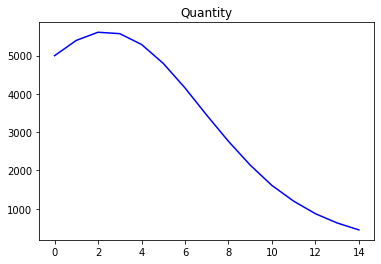

In [3]:
df["Quantity"].plot(style="blue")

plt.title("Quantity")

Text(0.5, 1.0, 'Total_Quantity')

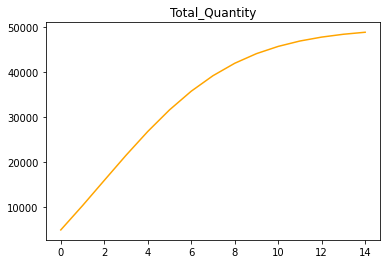

In [4]:
df["Total_Quantity"].plot(style="orange")

plt.title("Total_Quantity")

In [5]:
linRegData = pd.DataFrame()
linRegData["Quantity"] = df["Quantity"]
linRegData["N"] = df["Last_Total_Quantity"]
linRegData["N**2"] = df["Last_Total_Quantity_sq"]
linRegData

,Quantity,N,N**2
0,4998,0,0
1,5398,4998,24980004
2,5611,10396,108076816
3,5574,16007,256224049
4,5292,21581,465739561
5,4798,26873,722158129
6,4157,31671,1003052241
7,3445,35828,1283645584
8,2762,39273,1542368529
9,2141,42035,1766941225


In [6]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(linRegData[["N", "N**2"]].values, linRegData["Quantity"].values)

LinearRegression()

In [7]:
linearRegression.intercept_,    linearRegression.coef_

(4999.170101054309, array([ 9.99415961e-02, -3.99701729e-06]))

In [11]:
linearRegression.coef_[0]

0.09994159608950114

In [14]:
4999.170101054309+(linearRegression.coef_[0])*linRegData["N"][2]+(linearRegression.coef_[1])*linRegData["N**2"][2]

5606.178032147653

In [16]:
4999.170101054309+(linearRegression.coef_[0])*linRegData["Quantity"][0]+(linearRegression.coef_[1])*(linRegData["Quantity"][0])**2

5398.832690497578

In [ ]:
4999.170101054309+(linearRegression.coef_[0])*linRegData["Quantity"][0]+(linearRegression.coef_[1])*(linRegData["Quantity"][0])**2

In [17]:
T = 14
a = linearRegression.intercept_
b =  linearRegression.coef_[0]
c =  linearRegression.coef_[1]
a, b, c

(4999.170101054309, 0.09994159608950114, -3.99701728678897e-06)

In [18]:
m = (-b -sqrt(b ** 2-(4 * a * c))) /( 2 * c)
m

50012.36347728622

In [19]:
p = a/m

q = p + b

print("p:", p, " q: ", q)

p: 0.0999586852823852  q:  0.19990028137188634


In [20]:
predictionQt2 = [0,]
predictionN2 = [0,]

for i in range(0,T):
    N = predictionN2[i]
    adoptationT = (p*m)+(q-p)*N + (-q/m) * N**2
    adoptationT = round(adoptationT, 2)
    predictionQt2.append(adoptationT)
    predictionN2.append((predictionN2[i]+adoptationT))

In [21]:
bass_df = pd.DataFrame()
bass_df["Prediction_Quantity"]  = predictionQt2
bass_df["Prediction_Total_Quantity"]  = predictionN2

df = bass_df.join(df, on=None, how='left')

In [22]:
df

,Prediction_Quantity,Prediction_Total_Quantity,時点,Quantity,Total_Quantity,Last_Total_Quantity,Last_Total_Quantity_sq
0,0.00,0.00,1,4998,4998,0,0
1,4999.17,4999.17,2,5398,10396,4998,24980004
2,5398.90,10398.07,3,5611,16007,10396,108076816
3,5606.21,16004.28,4,5574,21581,16007,256224049
4,5574.88,21579.16,5,5292,26873,21581,465739561
5,5294.57,26873.73,6,4798,31671,26873,722158129
6,4798.34,31672.07,7,4157,35828,31671,1003052241
7,4155.04,35827.11,8,3445,39273,35828,1283645584
8,3449.29,39276.40,9,2762,42035,39273,1542368529
9,2758.58,42034.98,10,2141,44176,42035,1766941225


<Figure size 432x288 with 0 Axes>

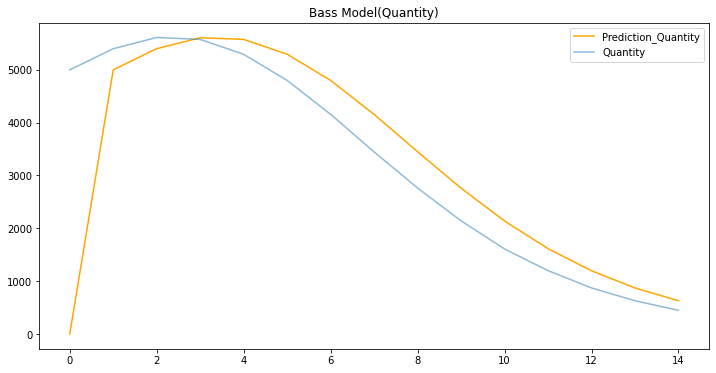

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize = (12,6))
df["Prediction_Quantity"].plot(color ="orange")
df["Quantity"].plot(alpha = 0.5)
plt.title("Bass Model(Quantity)")
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

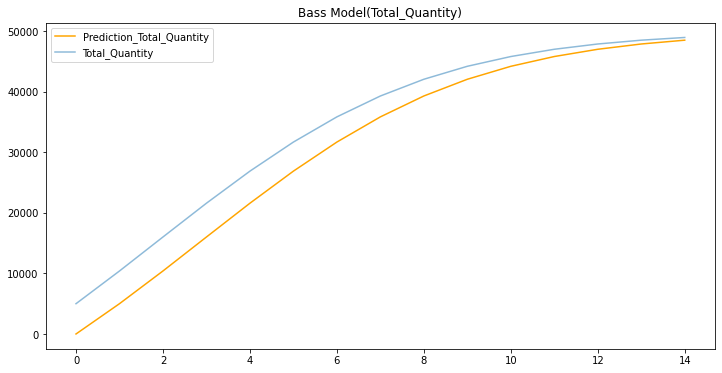

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize = (12,6))
df["Prediction_Total_Quantity"].plot(color ="orange")
df["Total_Quantity"].plot(alpha = 0.5)
plt.title("Bass Model(Total_Quantity)")
plt.legend()
plt.figure()